### Imports

In [3]:
%pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\varun\OneDrive\Documents\opencv\opencv\Drawsiness_Estimation\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
!cd yolov5 & pip install -r requirements.txt

You should consider upgrading via the 'c:\users\varun\onedrive\documents\opencv\opencv\drawsiness_estimation\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

### load model

In [8]:
#loading pre-trained model from torch hub (small model)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\varun/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-21 Python-3.8.10 torch-2.3.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### make detections

In [10]:
# img = 'https://ultralytics.com/images/zidane.jpg'
img = 'https://static.toiimg.com/thumb/msid-91776359,width-1280,height-720,resizemode-72/91776359.jpg'

In [11]:
results = model(img)
results.print()

image 1/1: 720x1280 3 persons, 14 cars, 1 truck
Speed: 137.0ms pre-process, 165.1ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


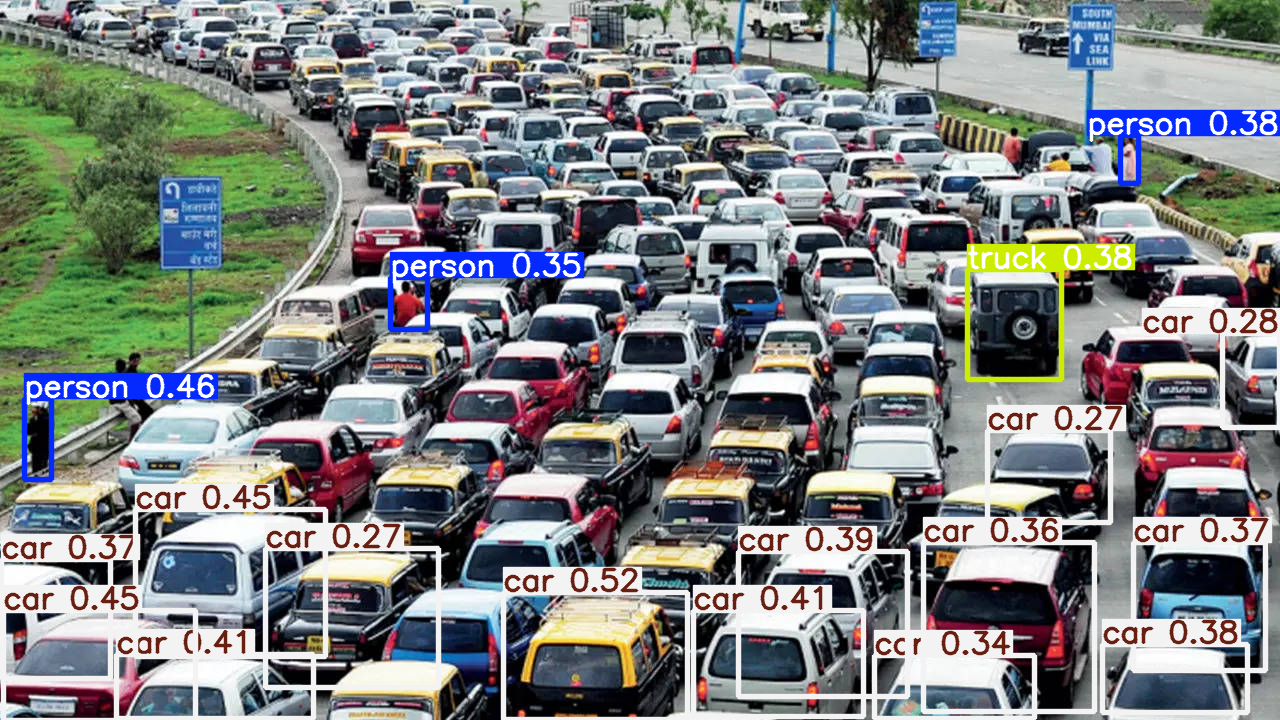

In [12]:
results.show()

In [13]:
np.array(results.render()).shape

(1, 720, 1280, 3)

In [14]:
np.squeeze(results.render()).shape # to get the image shape

(720, 1280, 3)

### realtime detections

In [15]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)
    cv2.imshow('frame', np.squeeze(results.render()))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

### train from scratch

In [16]:
import uuid
import os
import time

In [17]:
IMAGES_PATH = os.path.join('data', 'images') # data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [21]:
cap = cv2.VideoCapture(0)

for label in labels:
    print(f'Collecting images for {label}')

    time.sleep(5)
    for image in range(number_imgs):
        ret, frame = cap.read()

        imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')
        cv2.imwrite(imgname, frame)
        cv2.putText(frame, 'Collecting images for {}'.format(label), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        cv2.imshow('frame', frame)

        time.sleep(2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()